### Import Packages

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Face Detection

### Prepare File

In [3]:
vid = "/content/drive/MyDrive/thumbnail_generator/face_detection/아이스버거.mp4"

In [4]:
people = int(input("동영상에 등장하는 주요인물의 수는 몇 명인가요? : "))

동영상에 등장하는 주요인물의 수는 몇 명인가요? : 2


In [5]:
people

2

### Convert Video File to DataFrame

In [6]:
frames_raw = pd.DataFrame(columns=["frame","image"])

In [7]:
vidcap = cv2.VideoCapture(vid)
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

count = 0
while(vidcap.isOpened()):
  ret, image = vidcap.read()
  # read()는 grab()와 retrieve() 두 함수를 한 함수로 불러옴
  # 두 함수를 동시에 불러오는 이유는 프레임이 존재하지 않을 때
  # grab() 함수를 이용하여 return false 혹은 NULL 값을 넘겨 주기 때문
  if (int(vidcap.get(1)) % 20 == 0):
    print("비디오 처리중 ...(",round(int(vidcap.get(1))/length*100),"%)")
    frames_raw = frames_raw.append({"frame": count,"image":cv2.cvtColor(image, cv2.COLOR_BGR2RGB)},ignore_index=True)  #frames_df에 프레임값과 image(RGB 순으로 변환) 추가
    count += 1
  elif ret is False:
    break
vidcap.release()

비디오 처리중 ...( 1 %)
비디오 처리중 ...( 2 %)
비디오 처리중 ...( 3 %)
비디오 처리중 ...( 4 %)
비디오 처리중 ...( 5 %)
비디오 처리중 ...( 7 %)
비디오 처리중 ...( 8 %)
비디오 처리중 ...( 9 %)
비디오 처리중 ...( 10 %)
비디오 처리중 ...( 11 %)
비디오 처리중 ...( 12 %)
비디오 처리중 ...( 13 %)
비디오 처리중 ...( 14 %)
비디오 처리중 ...( 15 %)
비디오 처리중 ...( 16 %)
비디오 처리중 ...( 17 %)
비디오 처리중 ...( 18 %)
비디오 처리중 ...( 20 %)
비디오 처리중 ...( 21 %)
비디오 처리중 ...( 22 %)
비디오 처리중 ...( 23 %)
비디오 처리중 ...( 24 %)
비디오 처리중 ...( 25 %)
비디오 처리중 ...( 26 %)
비디오 처리중 ...( 27 %)
비디오 처리중 ...( 28 %)
비디오 처리중 ...( 29 %)
비디오 처리중 ...( 30 %)
비디오 처리중 ...( 31 %)
비디오 처리중 ...( 33 %)
비디오 처리중 ...( 34 %)
비디오 처리중 ...( 35 %)
비디오 처리중 ...( 36 %)
비디오 처리중 ...( 37 %)
비디오 처리중 ...( 38 %)
비디오 처리중 ...( 39 %)
비디오 처리중 ...( 40 %)
비디오 처리중 ...( 41 %)
비디오 처리중 ...( 42 %)
비디오 처리중 ...( 43 %)
비디오 처리중 ...( 44 %)
비디오 처리중 ...( 46 %)
비디오 처리중 ...( 47 %)
비디오 처리중 ...( 48 %)
비디오 처리중 ...( 49 %)
비디오 처리중 ...( 50 %)
비디오 처리중 ...( 51 %)
비디오 처리중 ...( 52 %)
비디오 처리중 ...( 53 %)
비디오 처리중 ...( 54 %)
비디오 처리중 ...( 55 %)
비디오 처리중 ...( 56 %)
비디오 처리중 ...( 57 %)
비

In [8]:
frames_raw.head()

,frame,image
0,0,"[[[141, 157, 155], [141, 157, 155], [141, 157,..."
1,1,"[[[86, 107, 116], [86, 107, 116], [86, 107, 11..."
2,2,"[[[86, 107, 114], [86, 107, 114], [86, 107, 11..."
3,3,"[[[84, 107, 116], [84, 107, 116], [84, 107, 11..."
4,4,"[[[84, 107, 116], [84, 107, 116], [84, 107, 11..."


In [9]:
len(frames_raw)

92

### Face Detection for All Frames

In [10]:
frames_df= frames_raw.copy()
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/thumbnail_generator/face_detection/haarcascade_frontalface_default.xml")

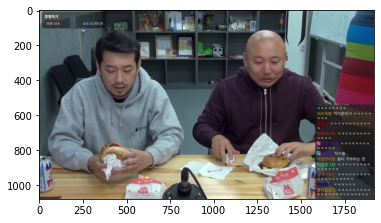

In [11]:
plt.imshow(frames_df.iloc[0,1])

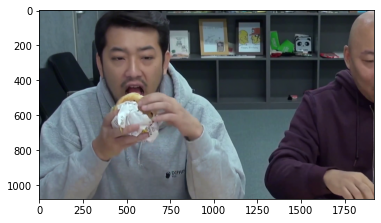

In [12]:
plt.imshow(frames_df.iloc[1,1])

In [13]:
height, width, channel = frames_df.iloc[0,1].shape

In [14]:
clmn = ["image","face_check"]
size_clmn = []
for p in range(people):
  clmn.append("face_"+str(p+1))
  size_clmn.append("w_"+str(p+1))
  size_clmn.append("h_"+str(p+1))
face_df = pd.DataFrame(columns= clmn + size_clmn)

face_df

,image,face_check,face_1,face_2,w_1,h_1,w_2,h_2


In [15]:
clmn = ["image","face_check"]
size_clmn = []
for p in range(people):
  clmn.append("face_"+str(p+1))
  size_clmn.append("w_"+str(p+1))
  size_clmn.append("h_"+str(p+1))
face_df = pd.DataFrame(columns= clmn + size_clmn)

k = 0
for idx in range(len(frames_df)): #한 프레임 당 이미지, 얼굴인식
  print(idx)
  frm = frames_df.iloc[idx,0]
  im = frames_df.iloc[idx,1]
  im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  face_im = im.copy()
  
  faces = face_cascade.detectMultiScale(im_gray, 1.3, 5) #얼굴 인식!
  
  if len(faces) == people : #face 인식 된 경우만
    new_face = {"image" : im}
    face_detected = 0

    for n_th in range(people): #사람별 이미지
        
        for (x,y,w,h) in [faces[n_th]]:
          print(x,y,w,h)
          if w!=0 and h!=0:
            x = max(round(x - w * 0.1) , 0)
            y = max(round(y - h * 0.3) , 0)
            w = round(w * 1.2)
            h = round(h * 1.4)

            new_face["w_"+str(n_th+1)] = w
            new_face["h_"+str(n_th+1)] = h
          
            cv2.rectangle(face_im,(x,y),(x+w,y+h),(255,0,0),2) # 원본 영상에 위치 표시
            roi_color = im[y:min(y+h,height), x:min(x+w,width)] # roi 
            new_face["face_" + str(n_th+1)] = roi_color
            face_detected += 1
            print("face:",face_detected)

    #한 프레임 다 끝나고      
    new_face["face_check"] = face_im
    
    if face_detected == people:
      k+=1
      print("success_",k)
      face_df = face_df.append(new_face,ignore_index=True)

face_raw = face_df.copy()
face_df.head()

0
1187 208 230 230
face: 1
329 248 258 258
face: 2
success_ 1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
358 214 266 266
face: 1
1018 372 79 79
face: 2
success_ 2
18
1058 170 275 275
face: 1
366 212 268 268
face: 2
success_ 3
19
20
1189 184 230 230
face: 1
459 731 196 196
face: 2
success_ 4
21
22
23
1121 226 241 241
face: 1
460 239 245 245
face: 2
success_ 5
24
25
397 264 243 243
face: 1
1148 256 242 242
face: 2
success_ 6
26
1134 222 258 258
face: 1
439 314 60 60
face: 2
success_ 7
27
1132 231 249 249
face: 1
453 334 62 62
face: 2
success_ 8
28
29
30
1107 159 243 243
face: 1
403 308 241 241
face: 2
success_ 9
31
1116 155 272 272
face: 1
395 305 252 252
face: 2
success_ 10
32
1107 180 265 265
face: 1
404 311 240 240
face: 2
success_ 11
33
1110 196 257 257
face: 1
394 317 238 238
face: 2
success_ 12
34
1184 256 231 231
face: 1
401 310 241 241
face: 2
success_ 13
35
452 234 248 248
face: 1
1188 275 219 219
face: 2
success_ 14
36
37
1190 266 217 217
face: 1
414 334 58 58
face: 2
success_ 1

,image,face_check,face_1,face_2,w_1,h_1,w_2,h_2
0,"[[[141, 157, 155], [141, 157, 155], [141, 157,...","[[[141, 157, 155], [141, 157, 155], [141, 157,...","[[[23, 32, 32], [23, 32, 32], [23, 32, 32], [2...","[[[76, 96, 101], [76, 96, 101], [76, 96, 101],...",276,322,310,361
1,"[[[141, 157, 155], [141, 157, 155], [141, 157,...","[[[141, 157, 155], [141, 157, 155], [141, 157,...","[[[74, 91, 95], [74, 91, 95], [74, 91, 95], [7...","[[[87, 77, 81], [95, 85, 89], [99, 85, 87], [9...",319,372,95,111
2,"[[[141, 157, 155], [141, 157, 155], [141, 157,...","[[[141, 157, 155], [141, 157, 155], [141, 157,...","[[[69, 77, 82], [90, 98, 103], [112, 120, 125]...","[[[67, 88, 95], [68, 87, 95], [68, 87, 95], [6...",330,385,322,375
3,"[[[143, 157, 153], [143, 157, 153], [143, 157,...","[[[143, 157, 153], [143, 157, 153], [143, 157,...","[[[88, 105, 107], [85, 102, 104], [85, 101, 99...","[[[0, 5, 13], [0, 2, 10], [0, 0, 8], [0, 0, 8]...",276,322,235,274
4,"[[[143, 157, 153], [143, 157, 153], [143, 157,...","[[[143, 157, 153], [143, 157, 153], [143, 157,...","[[[27, 33, 34], [27, 33, 34], [27, 33, 34], [2...","[[[16, 17, 20], [16, 17, 20], [16, 17, 22], [1...",289,337,294,343


In [16]:
for i in size_clmn:
  quartile_1 = face_raw[i].quantile(0.35)
  quartile_3 = face_raw[i].quantile(0.85)
  print(quartile_1,quartile_3)
  IQR = quartile_3 - quartile_1
  print(IQR)
  search_df = face_df[(face_df[i] < (quartile_1 - 1.5 * IQR)) | (face_df[i] > (quartile_3 + 1.5 * IQR))]
  print(search_df.index)
  face_df.drop(search_df.index, axis=0,inplace = True)
  face_df.reset_index(drop=True, inplace=True)

277.25 324.25
47.0
Int64Index([33, 34, 35], dtype='int64')
323.5 378.75
55.25
Int64Index([], dtype='int64')
283.0 330.5
47.5
Int64Index([1, 6, 7, 14, 23, 24], dtype='int64')
330.0 385.5
55.5
Int64Index([], dtype='int64')


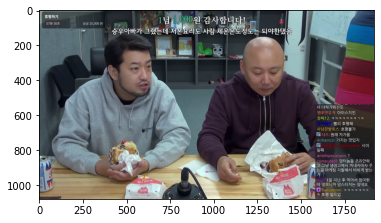

In [17]:
plt.imshow(face_df.iloc[10,0]) #전체 이미지

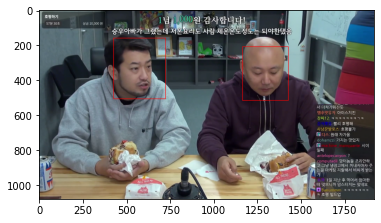

In [18]:
plt.imshow(face_df.iloc[10,1]) #얼굴영역 표시 이미지

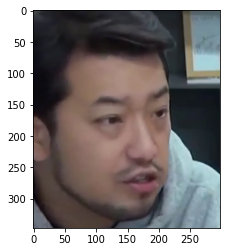

In [19]:
plt.imshow(face_df.iloc[10,2]) #첫번째 사람 얼굴

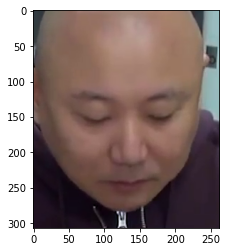

In [20]:
plt.imshow(face_df.iloc[10,3]) #두번째 사람 얼굴

In [21]:
len(face_df)

27

#Emotion Classifier

In [22]:
emotion_classifier = load_model('/content/drive/MyDrive/thumbnail_generator/face_detection/emotion_model.hdf5', compile=False)
EMOTIONS = ["Angry" ,"Disgusting","Fearful", "Happy", "Sad", "Surpring"]

In [23]:
avg_list = []
for i in range(len(face_df)):
  emotion_n=0
  emotion_prob = 0
  for j in range(people):
    print("turn:" ,i,j)
    canvas = np.zeros((250, 300, 3), dtype="uint8")
    image = face_df.iloc[i,j+2]
    roi_gray =  cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    roi_gray = cv2.resize(roi_gray, (48, 48))
    roi_gray = roi_gray.astype("float") / 255.0
    roi_gray = img_to_array(roi_gray)
    roi_gray = np.expand_dims(roi_gray, axis=0)

    preds = emotion_classifier.predict(roi_gray)[0]
    emotion_probability = np.max(preds)

    if emotion_probability:
      emotion_n += 1
      print("emotion success",emotion_n)
      emotion_prob += emotion_probability
  
  if emotion_n == 2 :
    avg_list.append( emotion_prob / emotion_n )
    
  else:
    face_df.drop(i,inplace=True)

final_df = face_df.copy()
final_df.reset_index(drop=True,inplace=True)
final_df["emotion_avg"] = avg_list

turn: 0 0
emotion success 1
turn: 0 1
emotion success 2
turn: 1 0
emotion success 1
turn: 1 1
emotion success 2
turn: 2 0
emotion success 1
turn: 2 1
emotion success 2
turn: 3 0
emotion success 1
turn: 3 1
emotion success 2
turn: 4 0
emotion success 1
turn: 4 1
emotion success 2
turn: 5 0
emotion success 1
turn: 5 1
emotion success 2
turn: 6 0
emotion success 1
turn: 6 1
emotion success 2
turn: 7 0
emotion success 1
turn: 7 1
emotion success 2
turn: 8 0
emotion success 1
turn: 8 1
emotion success 2
turn: 9 0
emotion success 1
turn: 9 1
emotion success 2
turn: 10 0
emotion success 1
turn: 10 1
emotion success 2
turn: 11 0
emotion success 1
turn: 11 1
emotion success 2
turn: 12 0
emotion success 1
turn: 12 1
emotion success 2
turn: 13 0
emotion success 1
turn: 13 1
emotion success 2
turn: 14 0
emotion success 1
turn: 14 1
emotion success 2
turn: 15 0
emotion success 1
turn: 15 1
emotion success 2
turn: 16 0
emotion success 1
turn: 16 1
emotion success 2
turn: 17 0
emotion success 1
turn:

In [24]:
final_df.sort_values(by= "emotion_avg", inplace = True,ascending=False,ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
plt.imshow(final_df.iloc[0,1])

In [ ]:
plt.imshow(final_df.iloc[1,1])

In [ ]:
plt.imshow(final_df.iloc[2,1])

In [ ]:
plt.imshow(final_df.iloc[3,1])

In [ ]:
plt.imshow(final_df.iloc[4,1])

In [ ]:
plt.imshow(final_df.iloc[5,1])

In [ ]:
plt.imshow(final_df.iloc[6,1])

In [ ]:
plt.imshow(final_df.iloc[7,1])

In [ ]:
plt.imshow(final_df.iloc[8,1])

In [ ]:
plt.imshow(final_df.iloc[9,1])

In [ ]:
plt.imshow(final_df.iloc[10,1])

In [ ]:
save_i = "_주펄 햄버거"

In [ ]:
a_directory = "/content/drive/MyDrive/thumbnail_generator/sample" + str(save_i) + "/전체화면"
b_directory = "/content/drive/MyDrive/thumbnail_generator/sample" + str(save_i) + "/얼굴별"

if not os.path.exists(a_directory):
  os.makedirs(a_directory)

if not os.path.exists(b_directory):
  os.makedirs(b_directory)

In [ ]:
for i in range(10):
  try:
    cv2.imwrite(a_directory+"/"+str(i)+".jpg",cv2.cvtColor(final_df.iloc[i,0], cv2.COLOR_BGR2RGB))
  
    for j in range(people):
      try:
        b_directory = "/content/drive/MyDrive/thumbnail_generator/sample" + str(save_i) + "/얼굴별/"
        cv2.imwrite(b_directory+str(i)+"_"+str(j)+".jpg",cv2.cvtColor(final_df.iloc[i,j+2], cv2.COLOR_BGR2RGB))
      except:
        print("!")
  except:
    print("!")